<a href="https://colab.research.google.com/github/araujoroberts/Proyectos/blob/main/Ecuaci%C3%B3n_de_onda_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solucion de la ecuacion de onda 1D

\begin{equation}
\frac{\partial^2 u}{\partial t^2}=c^2\frac{\partial ^2 u}{\partial x^2}
\end{equation}
Para esto vamos a discretizar usando:

$$
\frac{\partial ^2u}{\partial x^2}=\frac{u(x+h,t)-2u(x,t)+u(x-h,t)}{dx^2}
$$

y para el tiempo

$$
\frac{\partial ^2u}{\partial t^2}=\frac{u(x,t+k)-2u(x,t)+u(x,t-k)}{dt^2}
$$

Haciendo:
$$
u(x,t)=u^j_i \ \ , \ \ u(x+dx,t)=u^j_{i+1}\ \ , \ \ u(x-dx.t)=u^j_{i-1}
$$
y
$$
u(x,t+dt)=u^{j+1}_i\ \ \ \ y \ \ \ \ u(x,t-dt)=u^{j-1}_i
$$

Lo anterior quda:
$$
\frac{\partial ^2u}{\partial x^2}=\frac{u^j_{i+1}-2u^j_i+u^j_{i-1}}{dx^2}
$$
y
$$
\frac{\partial ^2u}{\partial t^2}=\frac{u^{j+1}_i-2u^j_i+u^{j+1}_i}{dt^2}
$$
donde el dominio fisico sera 
$$
0<x<L \ \ \ \ \ ;L=1m
$$
y la velocidad de propagacion:
$$
c=1.5\ m/s
$$
Condiciones iniciales
$$
u(x,0)=5m\ \ \ \ \ \ \ \ \left( \frac{\partial u}{\partial t} \right)_{t=0} =0\ m/s
$$
Las condiciones de frontera
$$
u(0,t)=0\ m \ \ \ \ \ \ \ y \ \ \ \ \ \ \ u(L,t)=0\ m
$$
Para la discretizacion espacial tomamos 5 nodos, entonces:
$$
N_x=5\ \ \ \ \ h=\frac{L}{N_x-1}=0.25
$$
Aqui el contador corre como  $i=0,1,2,...,N_x-1$ esto es

$$
x=(0\ ,\ 0.25\ ,\ 0.5\ ,\ 0.75\ ,\ 1)
$$
Expresando la ecuacion (1) en diferencias finitas

$$
\frac{u^{j+1}_i-2u^j_i+u^{j-1}_i}{dt^2}=c^2\left( \frac{u^j_{i+1}-2u^j_i+u^j_{i-1}}{dx^2}
  \right)
$$

Como no se conoce el termino $u^{j-1}_i$ usamos la condicion inicial $(\partial u/\partial t)_{t=0}=0$

$$
\frac{u^{j+1}_i-u^{j-1}_i}{2dt}=0 \ \ \ \ \ \rightarrow \ \ \ \ \ u^{j-1}_i=u^{j+1}_i
$$

sustituyendo esto en la ecuacion diferencial

$$
\frac{u^{j+1}_i-u^j_i}{dt^2}=\frac{c^2}{2}\left( \frac{u^j_{i+1}-2u^j_i+u^j_{i-1}}{dx^2}
  \right)
$$

$$
u^{j+1}_i=u^j_i+\frac{c^2dt^2}{2}\left( \frac{u^j_{i+1}-2u^j_i+u^j_{i-1}}{dx^2}
  \right)
$$
Entonces la ecuacion para la primera iteracion es

$$
u^{j+1}_i=\left( \frac{c^2dt^2}{2dx^2}\right)u^j_{i+1}+\left(1-c^2\frac{dt^2}{dx^2} \right)u^j_i+\left( \frac{c^2dt^2}{2dx^2}\right)u^j_{i-1}
$$

Del coeficiente de $u^j_i$ obtenemos el criterio de estabilidad para el paso de tiempo

$$
dt<dx/c
$$

Para la segunda iteracion ya se conoce el termino $u^{j-1}_i$ por lo tanto, la ecuacion que vale para todos los demas instantes de tiempo sera
$$
u^{j+1}_i=\left( \frac{c^2dt^2}{dx^2}\right)u^j_{i+1}+2\left(1-c^2\frac{dt^2}{dx^2} \right)u^j_i+\left( \frac{c^2dt^2}{dx^2}\right)u^j_{i-1}-u^{j-1}_i
$$

In [43]:
import numpy as np
import matplotlib.pyplot as plt

#Datos
L=1.
c=1.5
#Discretizacion
N=5
x=np.linspace(0,l,N)
dx=l/(N-1)
#Condiciones iniciales
t=0.
uinic=0.5
u=np.ones(N)*uinic
v=np.zeros(N)
#Condiciones de frontera
u0=0
uL=0
u[0]=u0
u[-1]=ul 
#Despues de cacular el critero de estbilidad tomamos dt=0.1 
dt=0.1
tfin=20.
#Inicializar las deformaciones
unew=u.copy()
uold=u.copy()
#vector de soluciones
usol=[u]
vsol=[v]
tsol=[t]

#Loop sobre el tiempo
#while t<tfin:
while t<=tfin:
  #primera iteracion
  if t==0.:
    #Loop resolver el espacio
    for i in range(N):
      if i==0:
        unew[i]=u0
      elif i==N-1:
        unew[i]=uL
      else:
        unew[i]=(c**2*dt**2/(2*dx**2))*u[i-1]+(1-c**2*dt**2/dx**2)*u[i]+(c**2*dt**2/(2*dx**2))*u[i+1]


  #segunda iteracion
  else:
    for i in range(N):
      if i==0:
        unew[i]=u0
      elif i==N-1:
        unew[i]=uL
      else:
        unew[i]=(c**2*dt**2/dx**2)*u[i-1]+(2-2*c**2*dt**2/dx**2)*u[i]+(c**2*dt**2/dx**2)*u[i+1]-uold[i]


  uold=u.copy()
  u=unew.copy()
  v=(unew-uold)/(2*dt)
  t=t+dt 
  #lista de estados: cada elemento de esta lista es otra lista con las poss/vel de todas las particulas en dicho instante
  usol.append(u)
  vsol.append(v)
  #lista de tiempos
  tsol.append(t)

#Convertimos las listas a vectores para poder trabajar con ellas mejor
usol=np.round(np.array(usol),3)
vsol=np.round(np.array(vsol),3)
tsol=np.round(np.array(tsol),3)
#grafiquemos en i=100
#i=2
#plt.plot(tsol,usol.T[i],'b-')
print(usol[1])


[0.   0.41 0.5  0.41 0.  ]


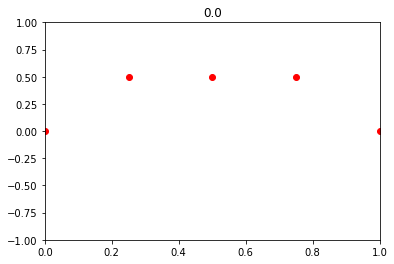

In [40]:
import matplotlib.animation as animation
fig=plt.figure()
ax=plt.gca()

def actualizar(i):
  ax.clear()
  plt.plot(x,usol[i],'ro')
  plt.title(str(tsol[i]))
  plt.xlim(0,L)
  plt.ylim(-1,1)


ani=animation.FuncAnimation(fig, actualizar, range(len(tsol)))
plt.show()